In [1]:
import torch
from tqdm import tqdm

# Image-related utilities
from torchvision.io import decode_image, read_image
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from PIL import Image

# Import models
from torchvision.models import alexnet, AlexNet_Weights
from torchvision.models import convnext_base, ConvNeXt_Base_Weights
from torchvision.models import densenet161, DenseNet161_Weights
from torchvision.models import efficientnet_v2_m, EfficientNet_V2_M_Weights
from torchvision.models import googlenet, GoogLeNet_Weights
from torchvision.models import vgg19, VGG19_Weights
from torchvision.models import resnet50, ResNet50_Weights
from torchvision.models import inception_v3, Inception_V3_Weights

# Plotting utility
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# TODO: Map number to class name
label_to_class = {
    0: "Shih-Tzu",         # n02086240
    1: "Rhodesian ridgeback",  # n02087394
    2: "Beagle",           # n02088364
    3: "English foxhound", # n02089973
    4: "Border terrier",   # n02093754
    5: "Australian terrier", # n02096294
    6: "Golden retriever", # n02099601
    7: "Old English sheepdog", # n02105641
    8: "Samoyed",          # n02111889
    9: "Dingo"             # n02115641
}

In [3]:
# Read in Imagewoof dataset
imagewoof_data = ImageFolder(root='/home/yi/Downloads/imagewoof2/val', transform=ToTensor())
data_loader = DataLoader(imagewoof_data, batch_size=1, shuffle=False)

In [4]:
# Evaluation function
def evaluate(model, data_loader, weights):
    # Record the number of correct classification
    correct = 0
    
    # Set model to eval mode
    model.eval()
    model.cuda()
    
    # Disable gradient computation
    with torch.no_grad():
        # Evaluation
        for feature, labels in tqdm(data_loader, desc="Evaluating", unit="images"):
            # Prepare image
            img = feature[0].squeeze()
            preprocess = weights.transforms(antialias=True)
            batch = preprocess(img).unsqueeze(0)
            batch = batch.to(next(model.parameters()).device)
            labels = labels.to(next(model.parameters()).device)
            # Prediction
            prediction = model(batch).squeeze(0).softmax(0)
            class_id = prediction.argmax().item()
            # score = prediction[class_id].item()
            category_name = weights.meta["categories"][class_id]
            # Update stat
            if(category_name == label_to_class[labels.item()]):
                correct += 1
            
    # Return the accuracy of the model
    return correct/len(data_loader)

In [5]:
# Initialize models
# AlexNet
weights_alex = AlexNet_Weights.DEFAULT
model_alex = alexnet(weights=weights_alex)

# ConvNeXt_Base
weights_convnext = ConvNeXt_Base_Weights.DEFAULT
model_convnext = convnext_base(weights=weights_convnext)

# DenseNet161
weights_densenet = DenseNet161_Weights.DEFAULT
model_densenet = densenet161(weights=weights_densenet)

# EfficientNet_V2
weights_efficientnet = EfficientNet_V2_M_Weights.DEFAULT
model_efficientnet = efficientnet_v2_m(weights=weights_efficientnet)

# GoogLeNet
weights_googlenet = GoogLeNet_Weights.DEFAULT
model_googlenet = googlenet(weights=weights_googlenet)

# VGG
weights_vgg = VGG19_Weights.DEFAULT
model_vgg = vgg19(weights=weights_vgg)

# ResNet50
weights_resnet = ResNet50_Weights.DEFAULT
model_resnet = resnet50(weights=weights_resnet)

# Inception V3
weights_inception = Inception_V3_Weights.DEFAULT
model_inception = inception_v3(weights=weights_inception)

In [6]:
# Evaluation step
acc_alexnet = evaluate(model_alex, data_loader, weights_alex)
print(f'AlexNet: {acc_alexnet}')

acc_convnext = evaluate(model_convnext, data_loader, weights_convnext)
print(f'ConvNeXt: {acc_convnext}')

acc_densenet = evaluate(model_densenet, data_loader, weights_densenet)
print(f'DenseNet: {acc_densenet}')

acc_efficientnet = evaluate(model_efficientnet, data_loader, weights_efficientnet)
print(f'EfficientNetV2: {acc_efficientnet}')

acc_googlenet = evaluate(model_googlenet, data_loader, weights_googlenet)
print(f'GoogLeNet: {acc_googlenet}')

acc_vgg = evaluate(model_vgg, data_loader, weights_vgg)
print(f'VGG19: {acc_vgg}')

acc_resnet = evaluate(model_resnet, data_loader, weights_resnet)
print(f'ResNet50: {acc_resnet}')

acc_inception = evaluate(model_inception, data_loader, weights_inception)
print(f'Inception: {acc_inception}')

Evaluating: 100%|██████████████████████| 3929/3929 [00:21<00:00, 181.18images/s]


AlexNet: 0.4861287859506236


Evaluating: 100%|███████████████████████| 3929/3929 [01:08<00:00, 57.03images/s]


ConvNeXt: 0.6413845762280479


Evaluating: 100%|███████████████████████| 3929/3929 [01:44<00:00, 37.50images/s]


DenseNet: 0.6006617459913464


Evaluating: 100%|███████████████████████| 3929/3929 [02:06<00:00, 31.10images/s]


EfficientNetV2: 0.6332400101807075


Evaluating: 100%|███████████████████████| 3929/3929 [00:54<00:00, 72.29images/s]


GoogLeNet: 0.5212522270297786


Evaluating: 100%|███████████████████████| 3929/3929 [01:01<00:00, 63.43images/s]


VGG19: 0.5688470348689234


Evaluating: 100%|███████████████████████| 3929/3929 [00:50<00:00, 78.34images/s]


ResNet50: 0.6141511835072537


Evaluating: 100%|███████████████████████| 3929/3929 [01:18<00:00, 50.16images/s]

Inception: 0.6174599134639858


Text(0.5, 1.0, 'Model accuracies on Imagewoof Dataset')

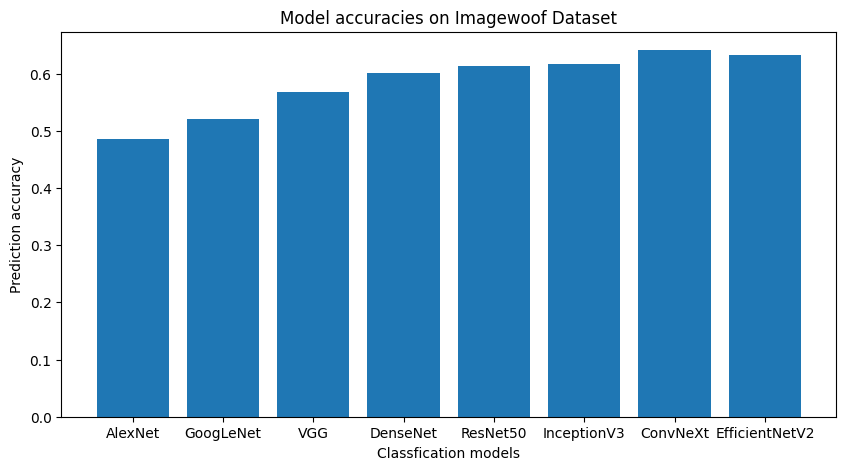

In [7]:
# Plotting accuracies
fig, ax = plt.subplots(figsize=(10, 5))

# Input data
model_name = ['AlexNet', 'GoogLeNet', 'VGG', 'DenseNet', 'ResNet50', 'InceptionV3', 'ConvNeXt', 'EfficientNetV2']
model_acc = [acc_alexnet, acc_googlenet, acc_vgg, acc_densenet, acc_resnet, acc_inception, acc_convnext, acc_efficientnet]

# Bar chart
ax.bar(model_name, model_acc)
ax.set_ylabel('Prediction accuracy')
ax.set_xlabel('Classfication models')
ax.set_title('Model accuracies on Imagewoof Dataset')

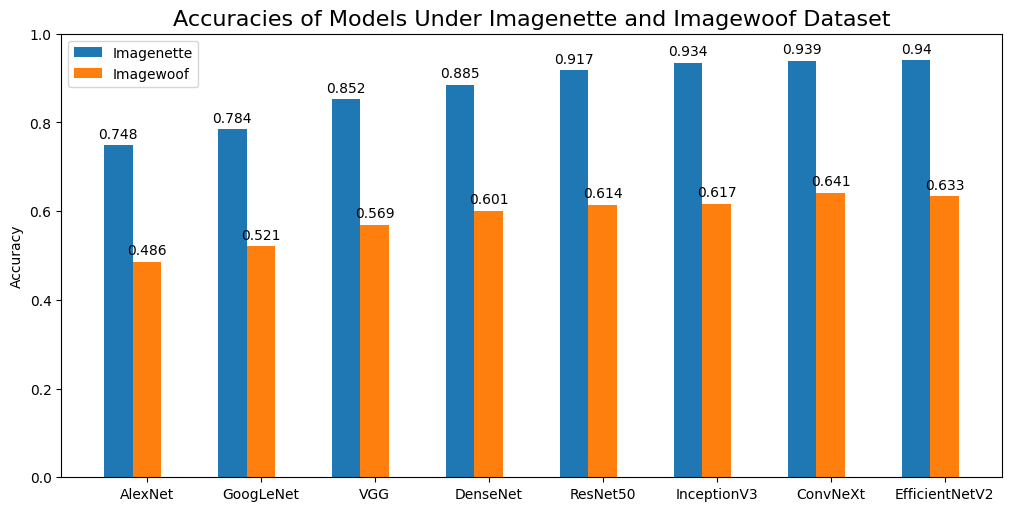

In [8]:
# Combined graph
models = ('AlexNet', 'GoogLeNet', 'VGG', 'DenseNet', 'ResNet50', 'InceptionV3', 'ConvNeXt', 'EfficientNetV2')
accuracies = {
    'Imagenette': (0.748, 0.784, 0.852, 0.885, 0.917, 0.934, 0.939, 0.940),
    'Imagewoof': (0.486, 0.521, 0.569, 0.601, 0.614, 0.617, 0.641, 0.633)
}


x = np.arange(len(models))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(10, 5))

for dataset, accuracy in accuracies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, accuracy, width, label=dataset)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel("Accuracy")
ax.set_title("Accuracies of Models Under Imagenette and Imagewoof Dataset", fontsize=16)
ax.set_xticks(x + width, models)
ax.legend(loc='upper left')
ax.set_ylim(0, 1)
plt.savefig('accuracy_compare.png')
plt.show()
